# EDA 

importing necessary libraries...

In [1]:
import numpy as np
import pandas as pd

# visiualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib import rcParams

# hypothesis testing 
import scipy.stats as stats
from random import sample

# imbalanced data undersampler
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.combine import SMOTEENN
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE

# model constructing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

## Missing values and data info

#### Data origin:
- about 75% of data was synthetically generated which leads us to believe that some data wont follow the known facts as this kind of data is derived from peoples existing data
- the rest of the data are real life data used for education purposes only. data was posted on kaggle by @FEDESORIANO

In [2]:
train1_df=pd.read_csv('train-1.csv')
train2_df=pd.read_csv('train-2.csv')
train_df=pd.concat((train1_df,train2_df))
test_df=pd.read_csv('test.csv')
print('__MISSING TRAINING VALUES__')
print(train_df.isnull().sum())
print('\n')
print('__MISSING TEST VALUES__')
print(test_df.isnull().sum())

__MISSING TRAINING VALUES__
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


__MISSING TEST VALUES__
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [3]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
print('number of stroke data: ',len(train_df[train_df['stroke']==1]))
print('number of non stroke data: ',len(train_df[train_df['stroke']==0]))

number of stroke data:  881
number of non stroke data:  19533


**we are dealing with imbalanced data later on the neccesarry measures for balancing the data will be taken**

### Labels and attributes:
1. `id`: patient id.
2. `gender`: "Male" or "Female".
3. `age`: age of patient.
4. `hypertension`: 1 for the patient who has hypertension and 0 for the patient that doesn't.
5. `heart_disease`: 1 for the patient who has a heart disease and 0 for the patient that doesn't.
6. `ever_married`: "Yes" or "No".
7. `work_type`: "Private", "Self-employed", "Govt_job", "children" or "Never_worked".
8. `Residence_type`: "Urban" or "Rural".
9. `avg_glucose_level`: average glucuse level in the patients blood.
10. `bmi`: body mass index.
11. `smoking_status`: "Unknown", "never smoked", "formerly smoked" or "never smoked".
12. `stroke`: 1 if the patient had a stroke or 0 if not.

- numerical data include: age, avg_glucose_level and bmi.
- categorical data include: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status.
>  NOTE: All categorical data are nominal

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20414 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20213 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


---
---

# Visualizations

## Data imbalance visualization

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\1535794777.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes_count = pd.value_counts(train_df['stroke'], sort=True)


Text(0.5, 1.0, 'Class count')

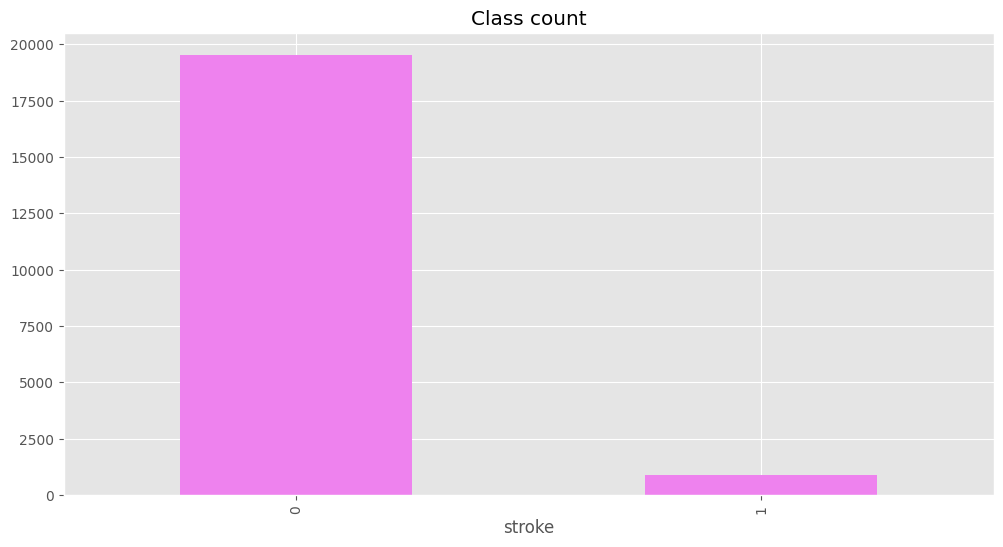

In [7]:
classes_count = pd.value_counts(train_df['stroke'], sort=True)
classes_count.plot(kind = 'bar', color='violet')
plt.title('Class count')

---

## Visualization and cleaning for each feature

1. Gender:
- no missing values as shown above.
- Stroke vs gender
- Test gender vs train gender(stroke and non stroke patients)

In [8]:
# stroke vs gender
stroke_patients = train_df[train_df['stroke']==1]
non_stroke_patients = train_df[train_df['stroke']==0]
fig = px.histogram(stroke_patients, x="gender",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\3602357652.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test gender'}, xlabel='gender', ylabel='count'>

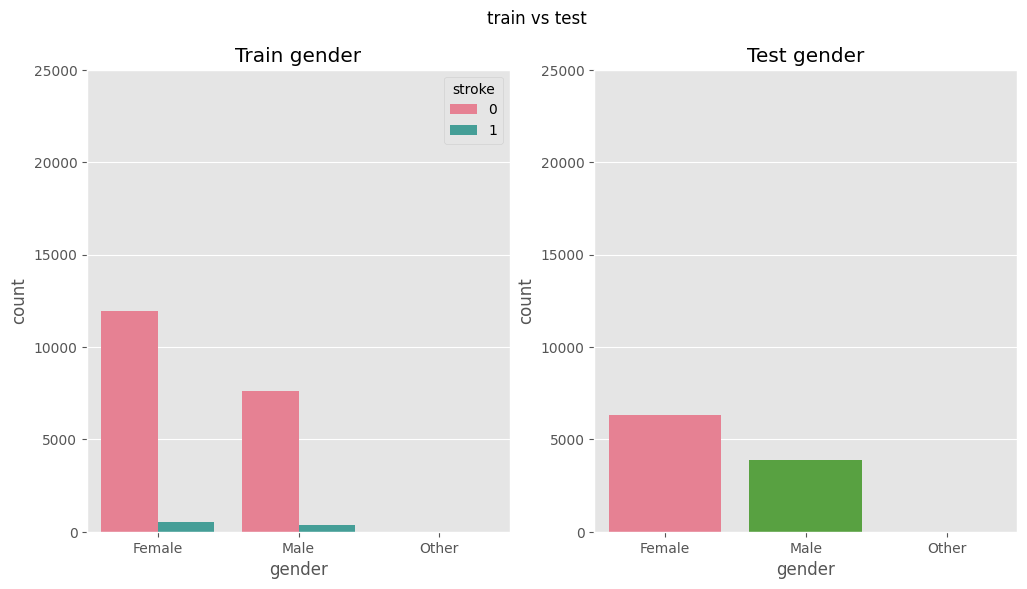

In [9]:
fig = plt.figure()
fig.suptitle('train vs test')
plt.tight_layout()


ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train gender')
sns.countplot(data=train_df, x="gender", ax=ax1, order=test_df['gender'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test gender')
sns.countplot(data=test_df, x="gender", ax=ax2, order=test_df['gender'].value_counts().index, palette= 'husl')


---

2. Age:
- no missing values as shown above.
- Stroke vs Age
- hypothesis testing for means of dependent samples of population of age data

In [10]:
fig = px.histogram(stroke_patients, x="age", marginal="box", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

<Axes: xlabel='age', ylabel='Count'>

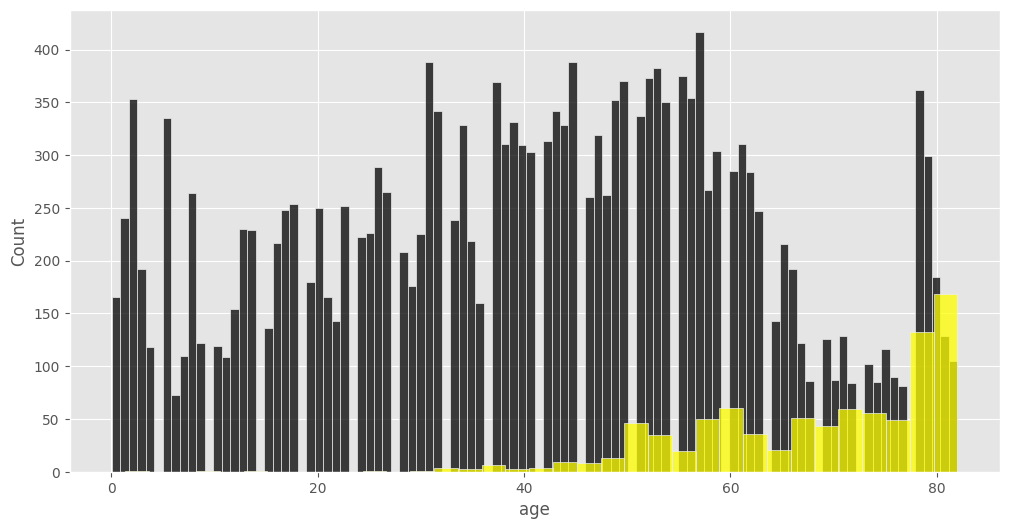

In [11]:
sns.histplot(non_stroke_patients['age'], color='black', bins=100)
sns.histplot(stroke_patients['age'], color='yellow', bins=35)

- age risk is a very important factore as you see in the graph above theres a positive colleration between age and having a stroke.

**because samples are dependent we are going to do a Paired Samples T-Test with 500 samples of each**<br />
our hypotheses are:
$H_0: \mu_D=0$, $H_1: \mu_D \neq 0$

In [12]:
# sample
stroke_sample = sample(stroke_patients['age'].values.tolist(), 500)
non_stroke_sample = sample(non_stroke_patients['age'].values.tolist(), 500)

# test
stats.ttest_rel(stroke_sample,non_stroke_sample)

TtestResult(statistic=np.float64(23.28444848134364), pvalue=np.float64(9.964865284149419e-82), df=np.int64(499))

**seeing that the p-value is less than 0.05 we reject the null hypothesis so we have enough proof to say that the mean of patients age isnt the same if the patient has had a stroke meaning this is a very important feature**

---

3. hypertension:
- no missing values as shown above.
- stroke vs hypertension
- Test hypertension vs train hypertension (stroke and non stroke patients)

In [13]:
fig = px.histogram(stroke_patients, x="hypertension",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\1142830322.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test hypertension'}, xlabel='hypertension', ylabel='count'>

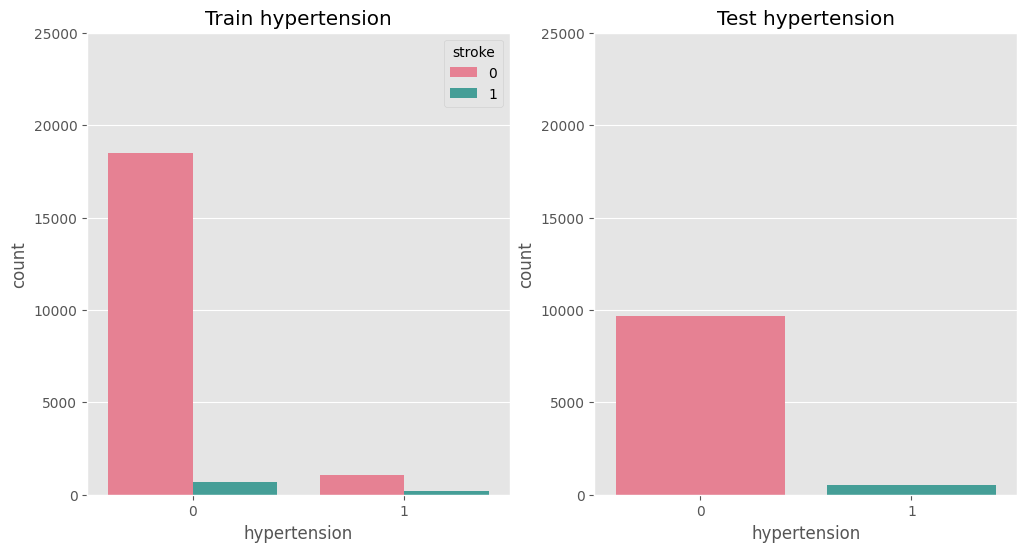

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train hypertension')
sns.countplot(data=train_df, x="hypertension", ax=ax1, order=train_df['hypertension'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test hypertension')
sns.countplot(data=test_df, x="hypertension", ax=ax2, order=test_df['hypertension'].value_counts().index, palette= 'husl' )

 - studies showed that having hypertension increases the probability of having a stroke. As the data is unrealistic we wont be using it in our training set.

In [15]:
print("probabiltiy of having hypertension and have had a stroke = ",len(train_df[(train_df['hypertension']==1)&(train_df['stroke']==1)])/ len(train_df[train_df['stroke']==1]))

probabiltiy of having hypertension and have had a stroke =  0.22020431328036322


In [16]:
print("probabiltiy of not having hypertension and have had a stroke = ",len(train_df[(train_df['hypertension']==0)&(train_df['stroke']==1)])/ len(train_df[train_df['stroke']==1]))

probabiltiy of not having hypertension and have had a stroke =  0.7797956867196367


---

4. heart disease:
- no missing values as shown above.
- stroke vs heart disease.
- Test heart disease vs train heart disease(stroke and non stroke patients).

In [17]:
fig = px.histogram(stroke_patients, x="heart_disease",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\2862503669.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test heart disease'}, xlabel='heart_disease', ylabel='count'>

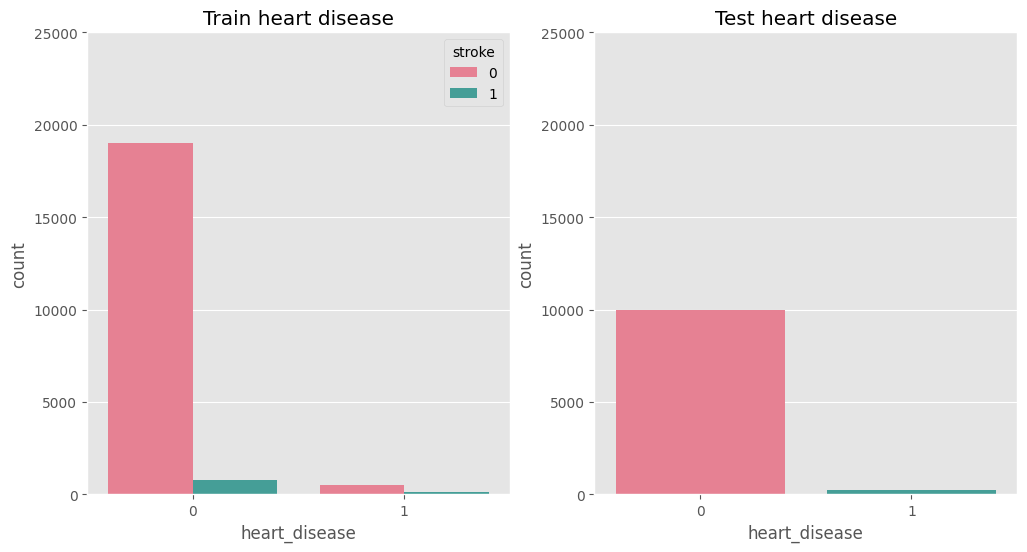

In [18]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train heart disease')
sns.countplot(data=train_df, x="heart_disease", ax=ax1, order=train_df['heart_disease'].value_counts().index, hue = 'stroke', palette= 'husl')

ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test heart disease')
sns.countplot(data=test_df, x="heart_disease", ax=ax2, order=test_df['heart_disease'].value_counts().index, palette= 'husl')

 - studies showed that having heart disease increases the probability of having a stroke. As the data is unrealistic we wont be using it in our training set.

In [19]:
print("probabiltiy of having a heart disease and have had a stroke = ",len(train_df[(train_df['heart_disease']==1)&(train_df['stroke']==1)])/ len(train_df[train_df['stroke']==1]))

probabiltiy of having a heart disease and have had a stroke =  0.1282633371169126


In [20]:
print("probabiltiy of not having a heart disease and have had a stroke = ",len(train_df[(train_df['heart_disease']==0)&(train_df['stroke']==1)])/ len(train_df[train_df['stroke']==1]))

probabiltiy of not having a heart disease and have had a stroke =  0.8717366628830874


---

5. ever married:
- no missing values as shown above.
- stroke vs ever married.
- Test heart ever married vs train heart ever married(stroke and non stroke patients).

In [21]:
fig = px.histogram(stroke_patients, x="ever_married",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\468865347.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test ever_married'}, xlabel='ever_married', ylabel='count'>

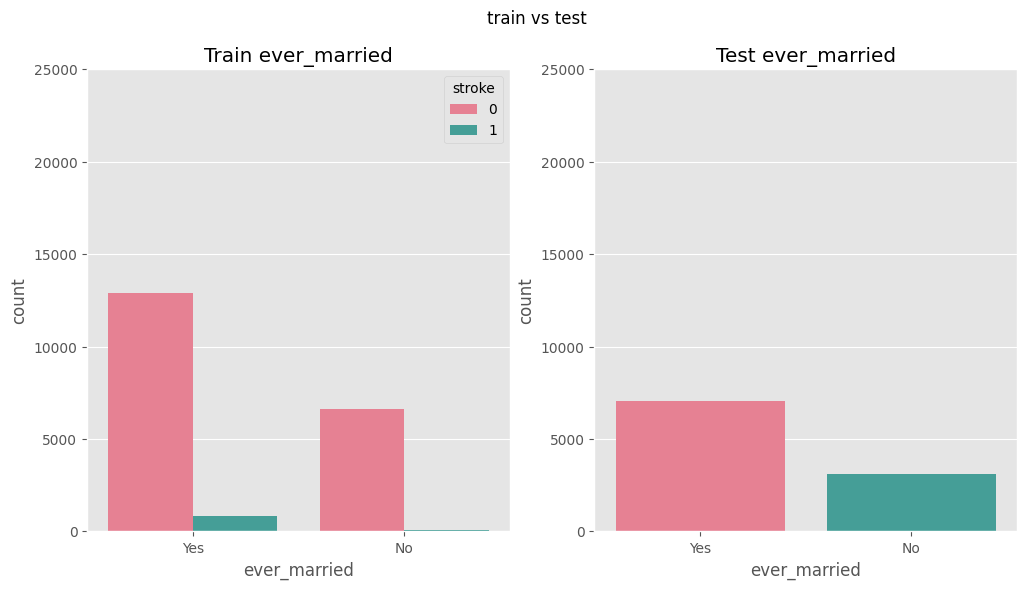

In [22]:
fig = plt.figure()
fig.suptitle('train vs test')
plt.tight_layout()


ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train ever_married')
sns.countplot(data=train_df, x="ever_married", ax=ax1, order=test_df['ever_married'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test ever_married')
sns.countplot(data=test_df, x="ever_married", ax=ax2, order=test_df['ever_married'].value_counts().index, palette= 'husl')


---

6. work type:
- no missing values as shown above.
- stroke vs work type.
- Test work type vs train work type(stroke and non stroke patients).

In [23]:
fig = px.histogram(stroke_patients, x="work_type",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\333955206.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test work_type'}, xlabel='work_type', ylabel='count'>

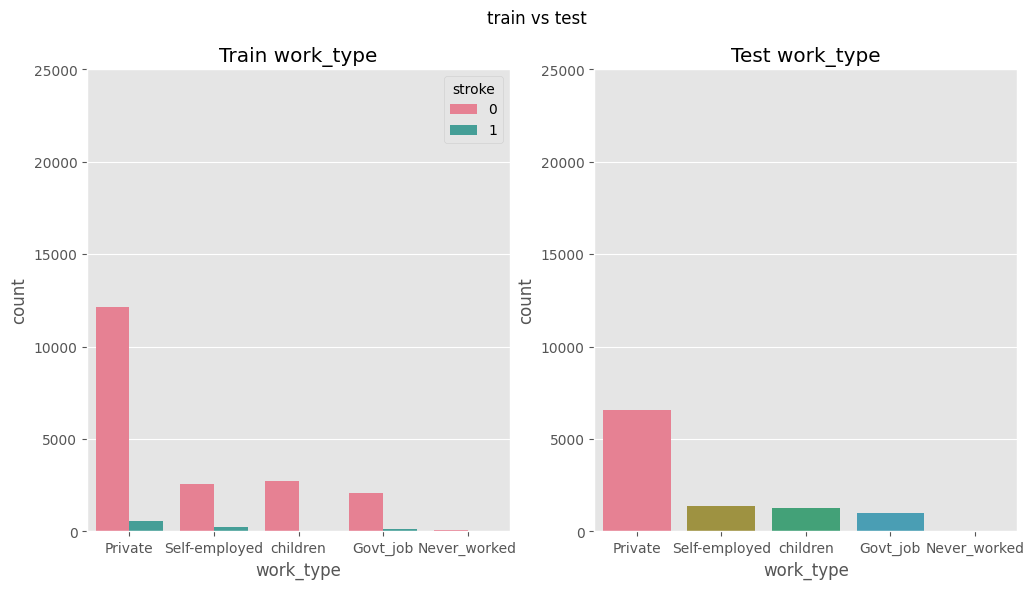

In [24]:
fig = plt.figure()
fig.suptitle('train vs test')
plt.tight_layout()


ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train work_type')
sns.countplot(data=train_df, x="work_type", ax=ax1, order=test_df['work_type'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test work_type')
sns.countplot(data=test_df, x="work_type", ax=ax2, order=test_df['work_type'].value_counts().index, palette= 'husl')


---

6. Residence type:
- no missing values as shown above.
- stroke vs residence type.
- Test residence type vs train residence type(stroke and non stroke patients).

In [25]:
fig = px.histogram(stroke_patients, x="Residence_type",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\4060799792.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test Residence_type'}, xlabel='Residence_type', ylabel='count'>

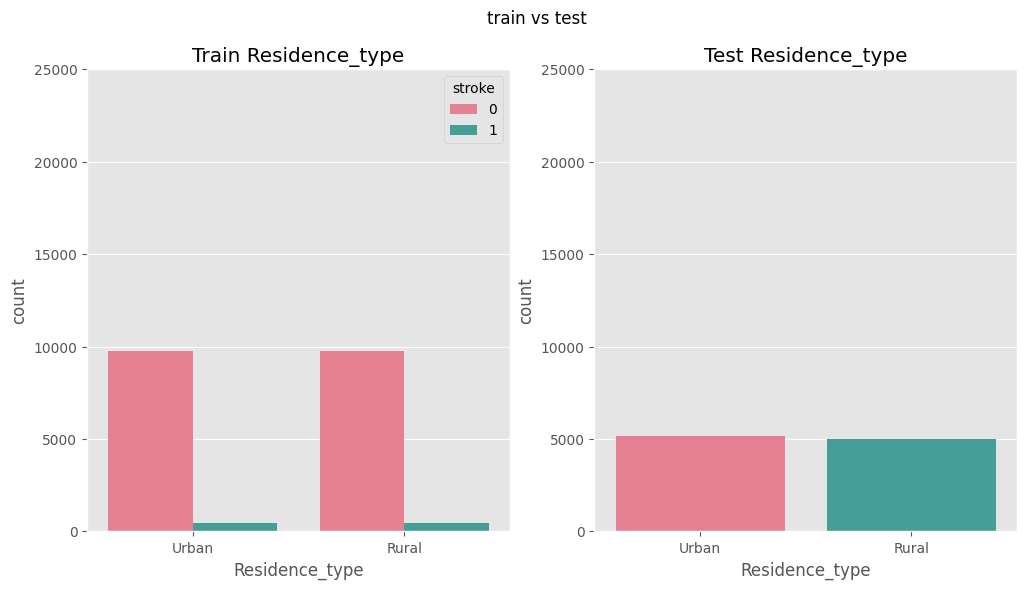

In [26]:
fig = plt.figure()
fig.suptitle('train vs test')
plt.tight_layout()


ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train Residence_type')
sns.countplot(data=train_df, x="Residence_type", ax=ax1, order=test_df['Residence_type'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test Residence_type')
sns.countplot(data=test_df, x="Residence_type", ax=ax2, order=test_df['Residence_type'].value_counts().index, palette= 'husl')


---

7. Average glucose level:
- no missing values as shown above.
- stroke vs Average glucose level.
- hypothesis testing for means of dependent samples of population of avg_glucose_level data.

In [27]:
fig = px.histogram(stroke_patients, x="avg_glucose_level", marginal="box", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

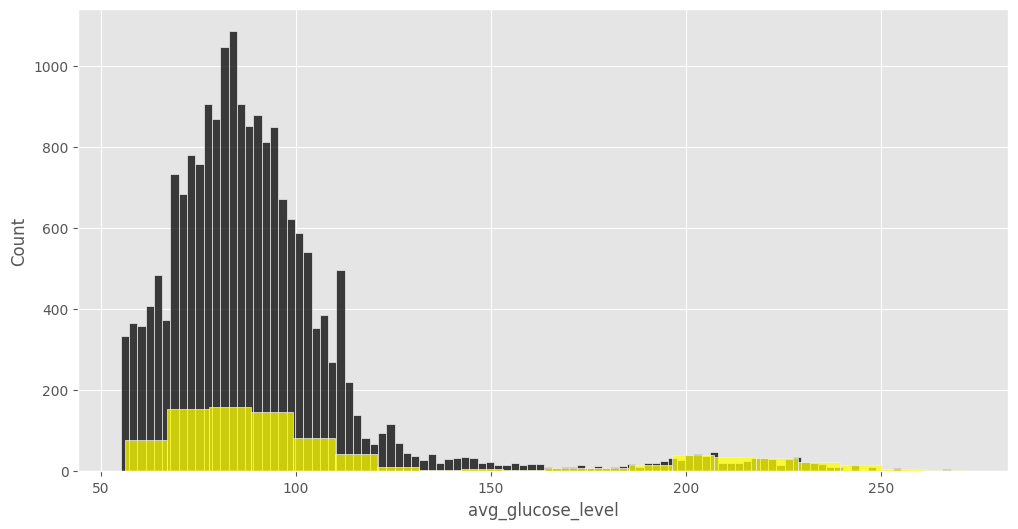

In [28]:
sns.histplot(non_stroke_patients['avg_glucose_level'], color='black', bins=100)
sns.histplot(stroke_patients['avg_glucose_level'], color='yellow', bins=20)

**because samples are dependent we are going to do a Paired Samples T-Test with 500 samples of each**<br />
our hypotheses are:
$H_0: \mu_D=0$, $H_1: \mu_D \neq 0$

In [29]:
# sample
stroke_sample = sample(stroke_patients['avg_glucose_level'].values.tolist(), 500)
non_stroke_sample = sample(non_stroke_patients['avg_glucose_level'].values.tolist(), 500)

# test
stats.ttest_rel(stroke_sample,non_stroke_sample)

TtestResult(statistic=np.float64(7.542667717636571), pvalue=np.float64(2.1945843738227122e-13), df=np.int64(499))

**seeing that the p-value is less than 0.05 we reject the null hypothesis so we have enough proof to say that the mean of patients glucose level isnt the same if the patient has had a stroke meaning this is a very important feature**

---

8. BMI:
- there are missing values.
- BMI distribution pre and after filling.
- hypothesis test.

In [30]:
fig = px.histogram(train_df, x="bmi",marginal="box",  color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

**As distribution is right-skewed we fill the data with the median**

In [31]:
train_df['bmi'].fillna(train_df['bmi'].median(),inplace=True)
stroke_patients = train_df[train_df['stroke']==1]
non_stroke_patients = train_df[train_df['stroke']==0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\678417113.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
fig = px.histogram(stroke_patients, x="bmi", marginal="box", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50), title_text='bmi of stroke patients')
fig.show()

<Axes: xlabel='bmi', ylabel='Count'>

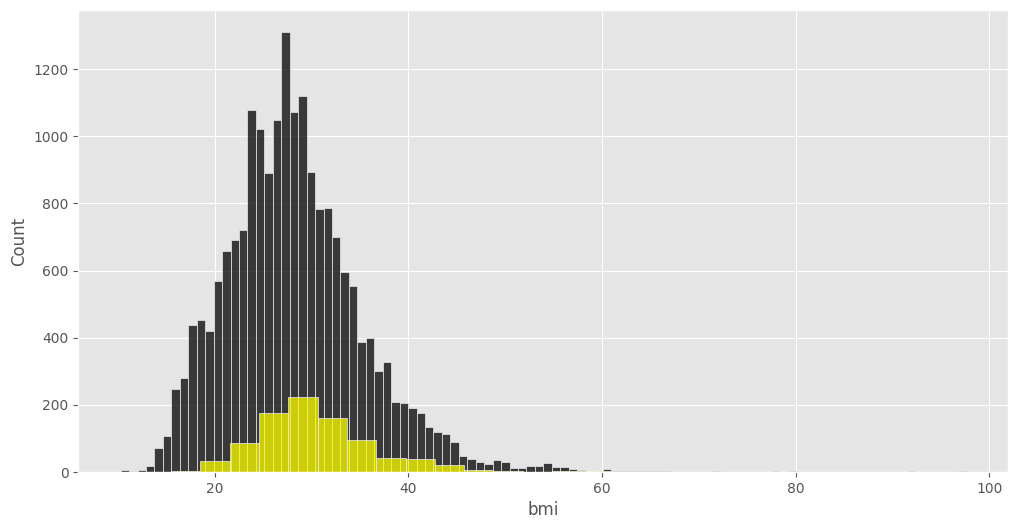

In [33]:
sns.histplot(non_stroke_patients['bmi'], color='black', bins=100)
sns.histplot(stroke_patients['bmi'], color='yellow', bins=15)

**because samples are dependent we are going to do a Paired Samples T-Test with 500 samples of each**<br />
our hypotheses are:
$H_0: \mu_D=0$, $H_1: \mu_D \neq 0$

In [34]:
# sample
stroke_sample = sample(stroke_patients['bmi'].values.tolist(), 500)
non_stroke_sample = sample(non_stroke_patients['bmi'].values.tolist(), 500)

# test
stats.ttest_rel(stroke_sample,non_stroke_sample)

TtestResult(statistic=np.float64(5.092368026916116), pvalue=np.float64(5.021240752861419e-07), df=np.int64(499))

**seeing that the p-value is less than 0.05 we reject the null hypothesis so we have enough proof to say that the mean of patients bmi isnt the same if the patient has had a stroke meaning this is a very important feature**

---

9. smoking status:
- unknown represent na values we will fill them with mode
- smoke status vs stroke
- train(stroke and non stroke patients) vs test

In [35]:
print('number of unknowns',len(train_df[train_df['smoking_status']=='Unknown']))

number of unknowns 6087


In [36]:
train_df['smoking_status'].replace('Unknown', train_df['smoking_status'].mode().values[0], inplace = True)
test_df['smoking_status'].replace('Unknown', test_df['smoking_status'].mode().values[0], inplace = True)
stroke_patients = train_df[train_df['stroke']==1]

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\399214364.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\399214364.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [37]:
fig = px.histogram(stroke_patients, x="smoking_status",  color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12528\481558737.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Test smoking_status'}, xlabel='smoking_status', ylabel='count'>

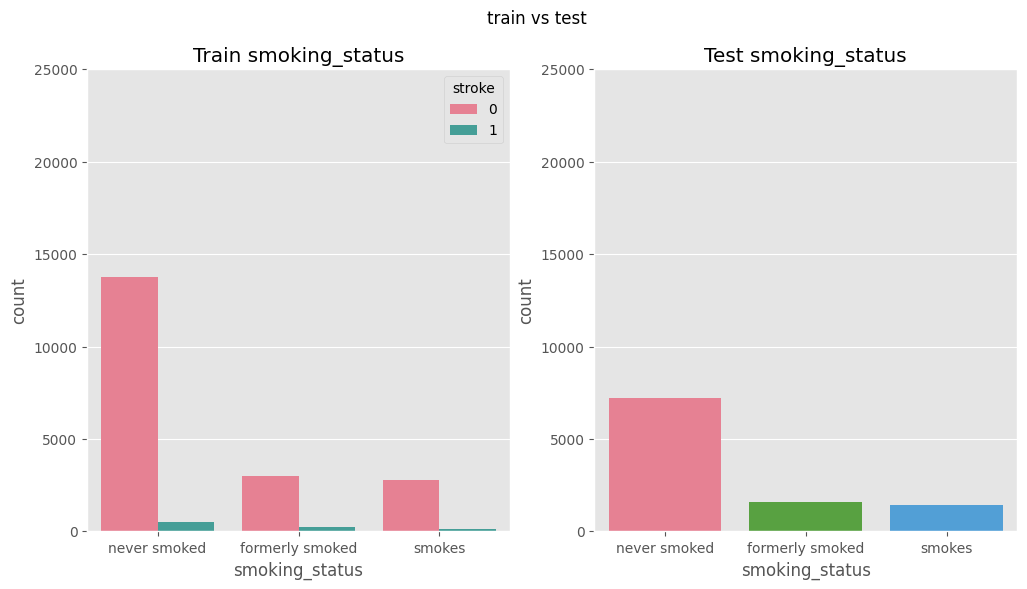

In [38]:
fig = plt.figure()
fig.suptitle('train vs test')
plt.tight_layout()


ax1 = fig.add_subplot(121)
ax1.set_ylim(0, 25000)
ax1.title.set_text('Train smoking_status')
sns.countplot(data=train_df, x="smoking_status", ax=ax1, order=test_df['smoking_status'].value_counts().index, hue = 'stroke', palette= 'husl')


ax2 = fig.add_subplot(122)
ax2.set_ylim(0, 25000)
ax2.title.set_text('Test smoking_status')
sns.countplot(data=test_df, x="smoking_status", ax=ax2, order=test_df['smoking_status'].value_counts().index, palette= 'husl')


----

**distribution of numerical data compared:**

In [39]:
colors = ['#A56CC1', '#A6ACEC', '#63F5EF']
num_data = stroke_patients[['age','bmi','avg_glucose_level']]
fig = ff.create_distplot([num_data[cn] for cn in num_data.columns], num_data.columns, colors=colors)
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50), title_text='Numerical Data')
fig.show()

---
---

# Data cleaning & preparation

- as shown above both hypertension and heart disease columns are unrealistic to the real world researches. we will not be using those for our model.
- we will be using all the numerical data as they are accurate and supported by real data researches 
- the left categorical data pose no bias risk so we will also use those for our model
-----

**we have done some data cleaning in the visualization part on the smoking status column (replacing unknown values by the most frequent value) and on the bmi column (replacing the nan values with the median -most appropriate value according to the distribution-) we will continue now with the preperation and cleaning of other columns**

--------

In [40]:
train_df['gender'].value_counts()

gender
Female    12440
Male       7972
Other         2
Name: count, dtype: int64

dropping "Other" values in gender as they compose less than 0.001% of data

In [41]:
train_df = train_df[train_df['gender']!='Other']

checking for duplicates

In [42]:
print('number of duplicates:',train_df.duplicated().sum()) # no duplicates

number of duplicates: 0


*X & y preperation*

In [43]:
x = train_df.drop(['id','stroke','hypertension', 'heart_disease'], axis = 1)
x.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,28.0,Yes,Private,Urban,79.53,31.1,never smoked
1,Male,33.0,Yes,Private,Rural,78.44,23.9,formerly smoked
2,Female,42.0,Yes,Private,Rural,103.00,40.3,never smoked
3,Male,56.0,Yes,Private,Urban,64.87,28.8,never smoked
4,Female,24.0,No,Private,Rural,73.36,28.8,never smoked


In [44]:
cat_val = x.select_dtypes('object')
x = pd.get_dummies(x, columns= cat_val.columns)
x.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,79.53,31.1,False,True,False,True,False,False,True,False,False,False,True,False,True,False
1,33.0,78.44,23.9,False,True,False,True,False,False,True,False,False,True,False,True,False,False
2,42.0,103.00,40.3,True,False,False,True,False,False,True,False,False,True,False,False,True,False
3,56.0,64.87,28.8,False,True,False,True,False,False,True,False,False,False,True,False,True,False
4,24.0,73.36,28.8,True,False,True,False,False,False,True,False,False,True,False,False,True,False


- get_dummies was used to turn all categorical columns into binary categories
- we can remove gender_female, ever_marries_no, Residence_type_Rural and smoking_status_never smoked as if gender_male = 0 then patient cant be a female and a male at the same time and if both values smoke and frmely smoked are 1 then the patient has never smoked and so on

In [45]:
x=x.drop(['gender_Female', 'ever_married_No', 'smoking_status_never smoked', 'Residence_type_Rural'], axis=1)
x.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_smokes
0,28.0,79.53,31.1,True,True,False,False,True,False,False,True,False,False
1,33.0,78.44,23.9,True,True,False,False,True,False,False,False,True,False
2,42.0,103.00,40.3,False,True,False,False,True,False,False,False,False,False
3,56.0,64.87,28.8,True,True,False,False,True,False,False,True,False,False
4,24.0,73.36,28.8,False,False,False,False,True,False,False,False,False,False


In [46]:
y = train_df['stroke']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

# Model 

**undersampling because data is imbalanced:**

In [47]:
us = RandomUnderSampler()
x_res, y_res = us.fit_resample(x, y)

In [48]:
print('x train and y train resampled shapes: ', x_res.shape, x_res.shape)

x train and y train resampled shapes:  (1762, 13) (1762, 13)


In [49]:
print('number of stroke data after undersampling: ',len(y_res[y_res==1]))
print('number of non stroke data after undersampling: ',len(y_res[y_res==0]))

number of stroke data after undersampling:  881
number of non stroke data after undersampling:  881


In [50]:
x_train, x_test,y_train, y_test =  train_test_split(x_res,y_res,test_size=0.2)

In [51]:
print('x train and y train shape: ', x_train.shape, y_train.shape)
print('x test and y test shape: ',x_test.shape, y_test.shape)

x train and y train shape:  (1409, 13) (1409,)
x test and y test shape:  (353, 13) (353,)


**we are going to use sklearn's SVM (Support Vector Machines) for its higher dimension effevtivness when dealing with high dimensional spaces and kernal customization. we also are going to use GridSearchCV to perform hyperparameter-tuning for the kernal, C(inverse of regulization) and gamma(weight of a single training example).**

In [52]:
param_grid =  { 'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf','linear']  }
svr = SVC(probability=True)
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3, scoring='f1')

grid.fit(x_train,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.678 total time=   2.6s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.680 total time=   3.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.690 total time=   2.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.685 total time=   2.5s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.689 total time=   1.7s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.824 total time=  14.2s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.807 total time=  20.9s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.801 total time=  24.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.790 total time=  12.6s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.816 total time=  19.9s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.754 total time=   2.5s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.751 total time=   1.5s
[CV 3/5] END ........C=1, ga

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='f1', verbose=3)

In [53]:
pred_prob=grid.predict_proba(x_test)[:,1]
pred_num = grid.predict(x_test)

In [54]:
print('best parameters after tuning: ',grid.best_params_)
print('model after hyperparameter tuning: ', grid.best_estimator_)

best parameters after tuning:  {'C': 100, 'gamma': 1, 'kernel': 'linear'}
model after hyperparameter tuning:  SVC(C=100, gamma=1, kernel='linear', probability=True)


- the confusion matrix:

In [55]:
conf_mat = confusion_matrix(pred_num, y_test)
print(conf_mat)

[[139  21]
 [ 45 148]]


- plotting of the confusion matrix:

<Axes: >

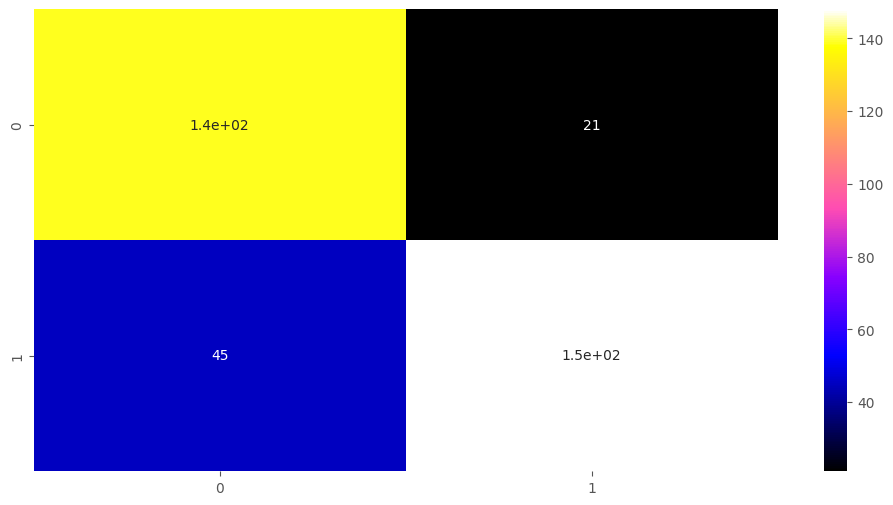

In [56]:
sns.heatmap(conf_mat, annot=True, cmap= 'gnuplot2')

- for our metric we are going to use accuracy score(sum of true positives and true negatives over sum of all predictions):

In [57]:
print('accuracy of model=',metrics.accuracy_score(pred_num, y_test)*100)

accuracy of model= 81.30311614730878


In [58]:
print(classification_report(y_test, pred_num))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       184
           1       0.77      0.88      0.82       169

    accuracy                           0.81       353
   macro avg       0.82      0.82      0.81       353
weighted avg       0.82      0.81      0.81       353



- ROC Curve:

In [60]:
svm_auc = roc_auc_score(y_test, pred_num)

rand_probs = [0 for _ in range(len(y_test))]
rand_auc = roc_auc_score(y_test,rand_probs)

print('Random prediction AUROC = ', rand_auc)
print('SVM AUROC = ', svm_auc)

Random prediction AUROC =  0.5
SVM AUROC =  0.815587213789555


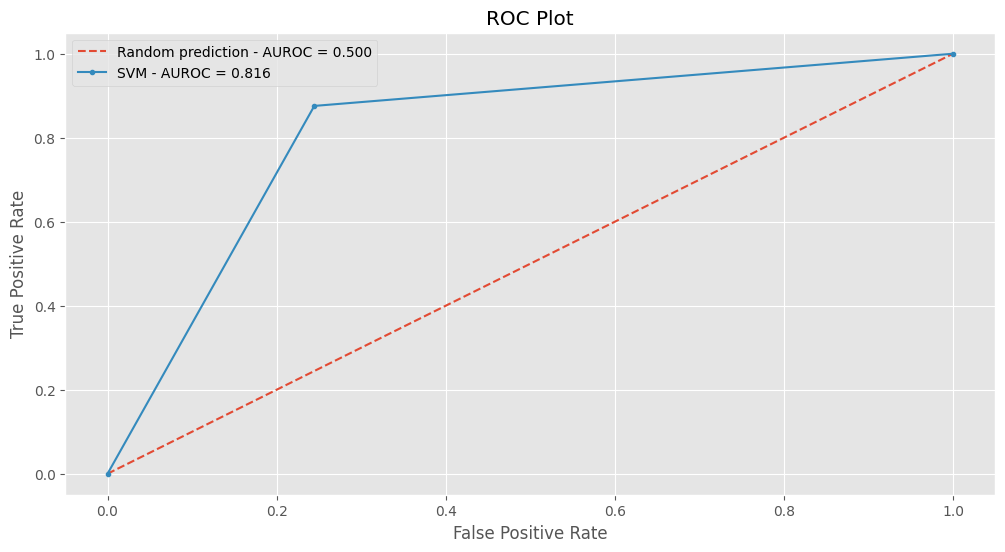

In [61]:
ran_fpr, ran_tpr, _ = roc_curve(y_test, rand_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, pred_num)


plt.plot(ran_fpr,ran_tpr, linestyle = '--', label = 'Random prediction - AUROC = %0.3f' %rand_auc)
plt.plot(svm_fpr, svm_tpr, marker ='.', label = 'SVM - AUROC = %0.3f' %svm_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Real Test Results:

In [62]:
x = test_df.drop(['id','hypertension', 'heart_disease'], axis = 1)
cat_val = x.select_dtypes('object')
x = pd.get_dummies(x, columns= cat_val.columns)
x=x.drop(['gender_Female', 'ever_married_No', 'smoking_status_never smoked', 'gender_Other','Residence_type_Rural'], axis=1)
x

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_smokes
0,57.0,82.54,33.4,False,True,False,False,True,False,False,False,False,False
1,70.0,72.06,28.5,True,True,False,False,True,False,False,True,False,False
2,5.0,103.72,19.5,False,False,False,False,False,False,True,True,False,False
3,56.0,69.24,41.4,False,True,True,False,False,False,False,True,False,True
4,32.0,111.15,30.1,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,27.0,75.77,17.6,False,False,False,False,True,False,False,True,False,False
10200,49.0,102.91,26.7,True,True,False,False,True,False,False,True,False,False
10201,3.0,104.04,18.3,False,False,False,False,False,False,True,False,False,False
10202,31.0,82.41,28.7,True,True,False,False,True,False,False,True,False,False


In [63]:
pred_svm = grid.predict_proba(x)[:,1]
res_ser=pd.Series(pred_svm, name ='stroke')
pred_svm

array([0.45357443, 0.69885125, 0.06922298, ..., 0.04982343, 0.06183636,
       0.04192574])

In [64]:
test_df=pd.read_csv('test.csv')
ids= test_df['id']
df_res= pd.concat([ids,res_ser], axis = 1, ignore_index= True)
df_res.rename(columns={0: "id", 1:'stroke'}, inplace=True)

In [66]:
import joblib
joblib.dump(grid, 'stroke_model.pkl')

['stroke_model.pkl']

In [69]:
import pickle
with open('stroke_model(1).pkl', 'wb') as f:
    pickle.dump(grid, f)